# Deterministic Models: Differential Equations

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

print("packages imported")

packages imported


## Learning Goals

* Classify differential equations: order, dimension, separable, linear, autonomous, homogeneous
* Apply analytical methods to find solutions of first order separable equations
* Apply analytical methods to find solutions of second order homogeneous equations with constant coefficients
* Approximate solutions of first order differential equations using numerical methods
* Visualize solutions of differential equations

## Prelecture Readings

* [MATH 360 > Differential Equations > Scalar Equations](https://ubcmath.github.io/MATH360/deterministic/differential/equations.html)
* [Mathematical Python > Differential Equations> First Order Equations](https://patrickwalls.github.io/mathematicalpython/differential-equations/first-order/)

## Clicker Questions

These will be available during class and in the posted notes after class. 

1. Which of the following equations is *linear*?
   
   A. $ty^{\prime \prime} + y^{\prime} + y^2 = 1$

   B. $ty^{\prime} + y^2 = 1$

   C. $y^{\prime} + y = \cos(t)$

   D. $(y^{\prime})^2 + y = 0$

2. Which of the following equations is *second order*?
   
   A. $ty^{\prime \prime} + y^{\prime} + y^2 = 1$

   B. $ty^{\prime} + y = 1$

   C. $y^{\prime} + y = \cos(t)$

   D. $y^{\prime} + y = 0$

3. Which of the following is the correct classification for $y^{\prime\prime} + \cos(y) = 0$?
   
   A. First order and linear.

   B. First order and nonlinear.

   C. Second order and linear.

   D. Second order and nonlinear.

4. Which of the following is the correct classification for $y^{\prime} + \cos(t)y = 0$?
   
   A. First order, linear, separable, and nonautonomous.

   B. First order, nonlinear, separable, and nonautonomous.

   C. First order, linear, nonseparable, and nonautonomous.

   D. First order, linear, separable, and autonomous.

## First Order Separable Equations

Find the general solution of each equation (algebraically) and plot the solution for different initial values $y(0)$.

$y' = \cos(t) y^2$

This is a separable differential equation.  
\begin{align*}
\int \frac{1}{y^2} dy &= \int \cos(t) dt\\
-\frac{1}{y} & = \sin(t) + C\\
\implies y & = - \frac{1}{(\sin(t) + C)}
\end{align*}
Define $y(0) = y_0$ so that $C = -\frac{1}{y0}$ upon substitution.

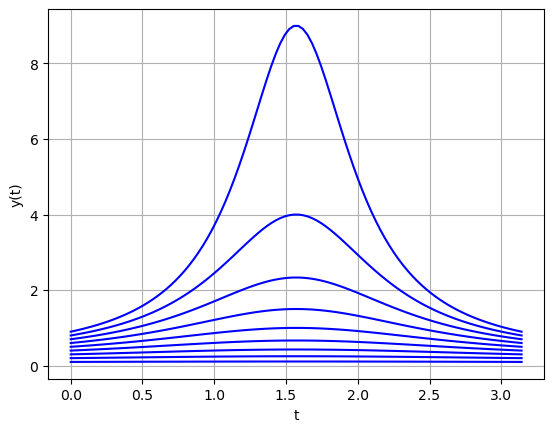

In [2]:
## not given y0 values, so we need to choose some.
## since C = 1/y0, we need to be careful to not pick y0 = 0.
## we will create a vector of y0 values and plot the solutions to see the behaviour
t = np.linspace(0,np.pi,100)
for y0 in np.arange(0.1,1,0.1):
    C = -1/y0
    y = -1/(np.sin(t) + C)
    plt.plot(t,y,'b')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()
## Note that colouring all the lines blue and without a legend is contrary to the
## math communication guidelines, so we would not want to use this plot to
## analyze and assess a model. We just want to see the behaviour for a range of 
## values, and then we can determine which y0 values may be of interest to show
## using different colour lines and a legend.

$y' = y(1 - y)$

This is a separable differential equation, but requires partial fractions.  
\begin{align*}
\int \frac{1}{y(1-y)} dy &= \int dt\\
\int \left(\frac{1}{y} + \frac{1}{1-y} \right) & dy = t + C\\
\ln(y) - \ln(1-y) &  = t + C\\
\implies y = \frac{Ce^t}{(1 + Ce^t)}
\end{align*}
Define $y(0) = y_0$ so that $C = y0/(1 - y0)$ upon substitution.

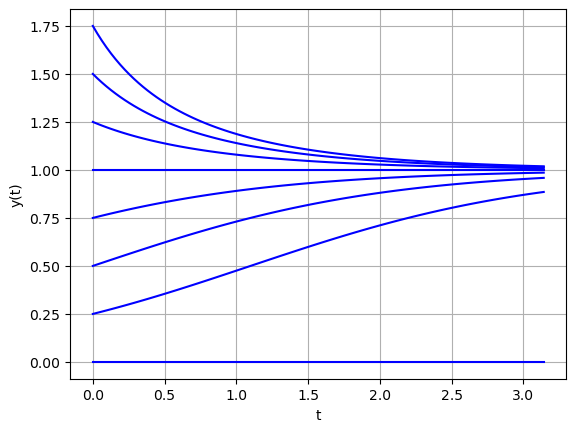

In [3]:
t = np.linspace(0,np.pi,100)
for y0 in np.arange(0,2,0.25):
    if y0 != 1: # we cannot plug y0 = 1 in to C, as this creates a division by zero.
        C = y0/(1 - y0)
        y = C*np.exp(t)/(1 + C*np.exp(t))
    else:
        y = np.ones(np.size(t))
    plt.plot(t,y,'b')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

$y' = ty - t$

This is a separable differential equation, but we need to factor the right-hand side first.  
\begin{align*}
\int \frac{1}{y-1} dy &= \int t dt\\
\ln(y-1) & = \frac{t^2}{2} + C\\
\implies y & = \hat{C}e^{\frac{t^2}{2}} + 1, ~~~~ \hat{C} = e^C
\end{align*}
Define $y(0) = y_0$ so that $C = y0-1$ upon substitution.

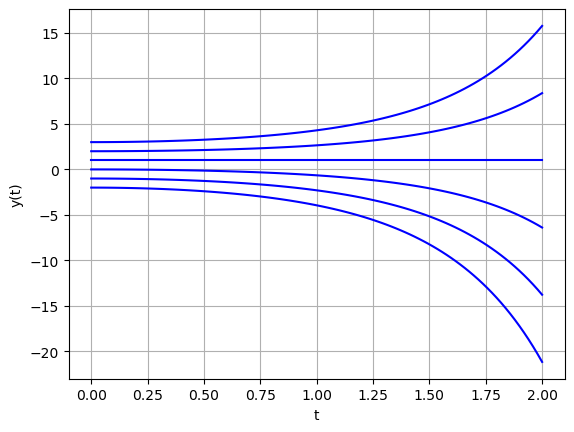

In [4]:
t = np.linspace(0,2,100)
for y0 in range(-2,4):
    C = y0 - 1
    y = C*np.exp(t**2/2) + 1
    plt.plot(t,y,'b')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

$y' + (t + 1)y = t + 1$

This is a separable differential equation.  
\begin{align*}
y^{\prime} &= (t + 1) - (t+1)y\\
& = (t+1)(1-y)
\int \frac{1}{1-y} dy &= \int t+1 dt\\
-\ln(1-y) & = \frac{t^2}{2} + t + C\\
\implies y & = 1-\hat{C}e^{-\frac{t^2}{2}-t}, ~~~~ \hat{C} = e^C
\end{align*}
Define $y(0) = y_0$ so that $C = 1-y0$ upon substitution.

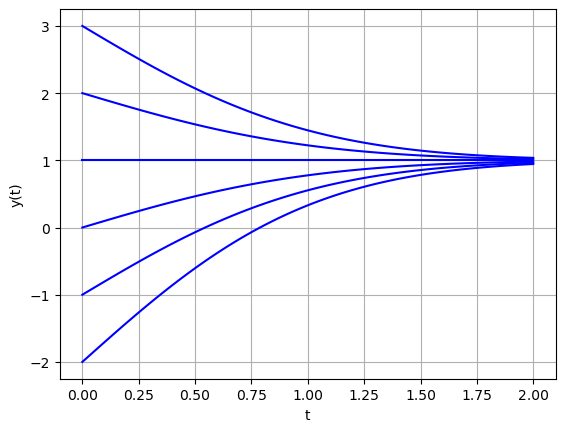

In [5]:
t = np.linspace(0,2,100)
for y0 in range(-2,4):
    C = 1 - y0
    y = 1 - C*np.exp(-t**2/2 - t)
    plt.plot(t,y,'b')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

## Second Order Homogeneous Equations with Constant Coefficients

Find the unique solution of each equation (algebraically) and plot the result.

$y'' + y = 0$, $y(0) = 1$, $y'(0) = 0$

For second order homogeneous equations, we need to calculate the characteristic polynomial and then the solution form will be given by the type of roots.

\begin{align*}
\lambda^2 + 1 & = 0 \\
\lambda^2 & = -1 \\
\lambda & = \pm i
\end{align*}

Complex roots.  Solution has form $y(t) = C_1 \cos(t) + C_2 \sin(t).$  Apply initial conditions.

\begin{align*}
y(0) = 1 \implies C_1 &= 1\\ 
y^{\prime}(0) = 0 \implies C_2 &= 0\\
\implies y(t) & = \cos(t)
\end{align*}

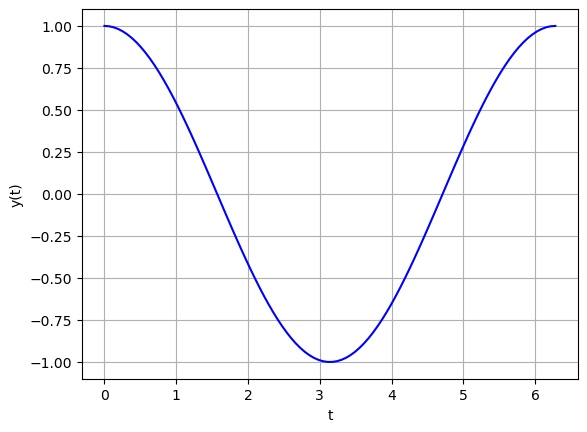

In [6]:
## plot the solution
t = np.linspace(0,2*np.pi,100) # not given time range, so choose one
C1 = 1; 
C2 = 0; #while we don't need this parameter, it can be helpful to include incase we made an algebraic error
y = C1*np.cos(t) + C2*np.sin(t)
plt.plot(t,y,'b')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

$y'' - y = 0$, $y(0) = 1$, $y'(0) = 0$

Calculate characteristic polynomial.

\begin{align*}
\lambda^2 - 1 & = 0 \\
\lambda^2 & = 1 \\
\lambda & = \pm 1
\end{align*}

Real and distinct roots.  Solution has form $y(t) = C_1 e^t + C_2 e^{-t}.$  Apply initial conditions.

\begin{align*}
y(0) = 1 \implies C_1 + C_2 &= 1\\ 
y^{\prime}(0) = 0 \implies C_1 - C_2 &= 0\\
\implies C_1 & = \frac{1}{2}\\
C_2 & = \frac{1}{2} \\ 
\implies y(t) & = \frac{1}{2} e^t + \frac{1}{2} e^{-t}
\end{align*}

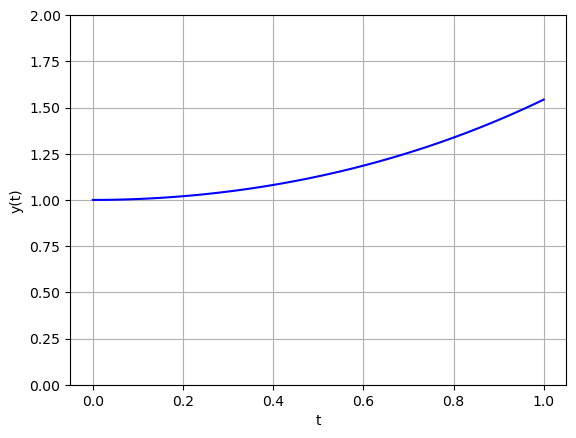

In [7]:
## plot the solution
## again no time values given, so we will pick the interval [0,1] and see what 
## the plot looks like and adjust if needed
t = np.linspace(0,1,100)
C1 = 1/2 
C2 = 1/2
y = C1*np.exp(t) + C2*np.exp(-t)
plt.plot(t,y,'b')
plt.ylim([0,2])
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

$y'' + 2y' + y = 0$, $y(0) = 1$, $y'(0) = 0$

Calculate characteristic polynomial.

\begin{align*}
\lambda^2 + 2 \lambda +1 & = 0 \\
(\lambda + 1) ^2 & = 0 \\
\lambda & = -1
\end{align*}

Real and repeated roots.  Solution has form $y(t) = C_1 e^{-t} + C_2 te^{-t}.$  Apply initial conditions.

\begin{align*}
y(0) = 1 \implies C_1 &= 1\\ 
y^{\prime}(0) = 0 \implies - C_1 + C_2 &= 0\\
\implies C_2 & = 1\\
\implies y(t) & = e^{-t} + t e^{-t}
\end{align*}

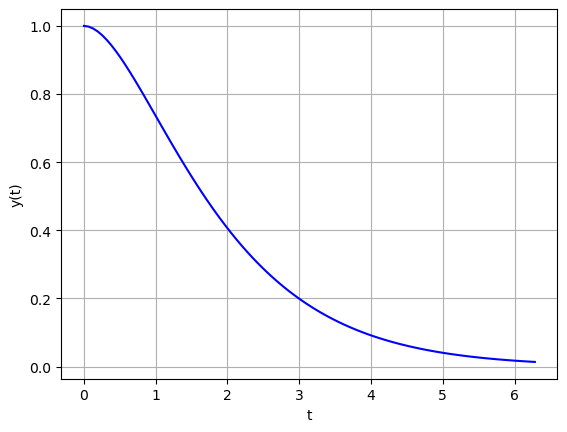

In [8]:
t = np.linspace(0,2*np.pi,100)
C1 = 1
C2 = 1
y = C1*np.exp(-t) + C2*t*np.exp(-t)
plt.plot(t,y,'b')
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

## Euler's Method

In [9]:
## copied from the pre-readings
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n+1] - t[n])
    return y

Use Euler's method to approximate the solutions of the following equations and compare to the exact solutions:

$y' = \cos(t) y^2$, $y(0) = 1/2$

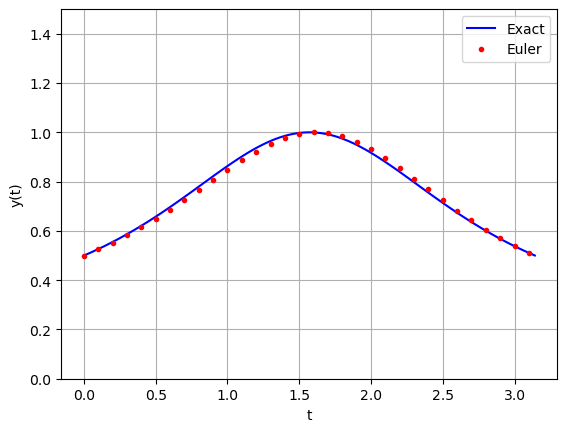

In [10]:
tf = np.pi
t = np.linspace(0,tf,100)
y = -1/(np.sin(t) - 2)
plt.plot(t,y,'b')

f = lambda t,y: np.cos(t)*y**2
y0 = 1/2
h = 0.1
t_euler = np.arange(0,tf,h)
y_euler = odeEuler(f,t_euler,y0)
plt.plot(t_euler,y_euler,'r.')

plt.ylim([0,1.5])
plt.grid(True)
plt.legend(['Exact','Euler'])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

$y' = y(1 - y)$, $y(0) = 0.5$

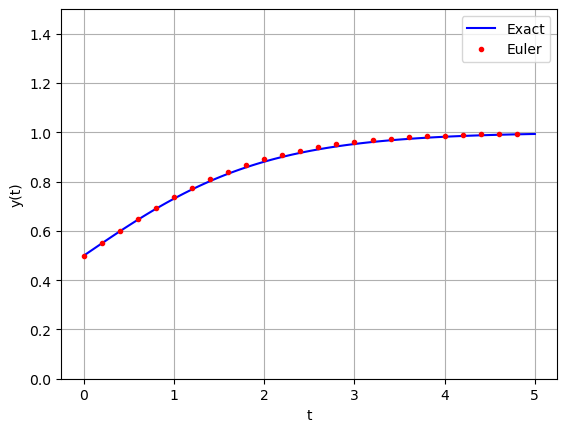

In [11]:
tf = 5
t = np.linspace(0,tf,100)
y = np.exp(t)/(1 + np.exp(t))
plt.plot(t,y,'b')

f = lambda t,y: y*(1 - y)
y0 = 1/2
h = 0.2
t_euler = np.arange(0,tf,h)
y_euler = odeEuler(f,t_euler,y0)
plt.plot(t_euler,y_euler,'r.')

plt.ylim([0,1.5])
plt.grid(True)
plt.legend(['Exact','Euler'])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

$y' = ty - t$, $y(0) = 2$

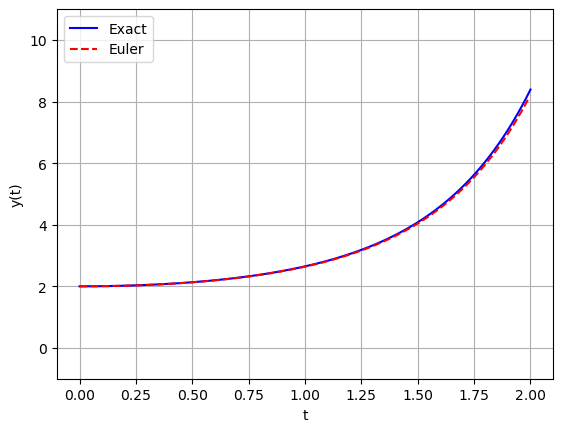

In [12]:
tf = 2
t = np.linspace(0,tf,100)
y = np.exp(t**2/2) + 1
plt.plot(t,y,'b')

f = lambda t,y: t*y - t
y0 = 2
h = 0.01
t_euler = np.arange(0,tf,h)
y_euler = odeEuler(f,t_euler,y0)
plt.plot(t_euler,y_euler,'r--') ## dashed line here since the number of points in t does not render clearly

plt.ylim([-1,11])
plt.grid(True)
plt.legend(['Exact','Euler'],loc='upper left')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

$y' + (t + 1)y = t + 1$, $y(0) = 0$

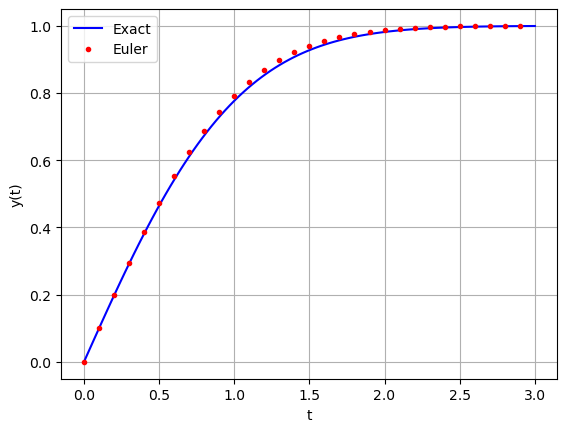

In [13]:
tf = 3
t = np.linspace(0,tf,100)
y = 1 - np.exp(-t**2/2 - t)
plt.plot(t,y,'b')

f = lambda t,y: (1 + t)*(1 - y)
y0 = 0
h = 0.1
t_euler = np.arange(0,tf,h)
y_euler = odeEuler(f,t_euler,y0)
plt.plot(t_euler,y_euler,'r.')

plt.grid(True)
plt.legend(['Exact','Euler'])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

Give an example of a first order differential equation which cannot be solved explicitly with elementary functions. Use Euler's method to approximate solutions of this equation.

One option would be to include a function which we are not able to integrate in the DE. For example, to solve $y^{\prime}(t) = e^{-\frac{t^3}{2}}$ we would need to make use of numerical methods.

### Numerical Solutions with SciPy

Use `scipy.integrate.odeint` to approximate the solutions of the following equations and compare to the exact solutions.

$y' = \cos(t) y^2$, $y(0) = 1/2$

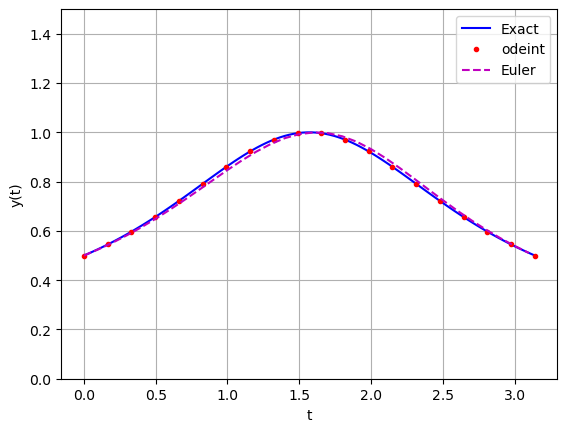

In [14]:
tf = np.pi
t = np.linspace(0,tf,100)
y = -1/(np.sin(t) - 2)
plt.plot(t,y,'b')

f = lambda y,t: np.cos(t)*y**2  
## notice here the order of the y and t in the lambda function has changed.  The package odeint requires to have the
## independent variable first, then the dependences
y0 = 1/2
T = np.linspace(0,tf,20)
Y = spi.odeint(f,y0,T)
plt.plot(T,Y,'r.')

## can also add in the Euler solution for comparison
f = lambda t,y: np.cos(t)*y**2 ## notice here that the lambda function has t,y for Euler's method
y0 = 1/2
h = 0.1
t_euler = np.arange(0,tf,h)
y_euler = odeEuler(f,t_euler,y0)
plt.plot(t_euler,y_euler,'m--')

plt.ylim([0,1.5])
plt.grid(True)
plt.legend(['Exact','odeint','Euler'])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

$y' = y(1 - y)$, $y(0) = 0.5$

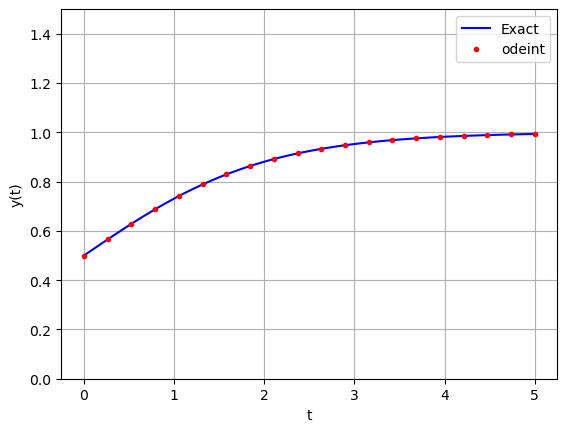

In [15]:
tf = 5
t = np.linspace(0,tf,100)
y = np.exp(t)/(1 + np.exp(t))
plt.plot(t,y,'b')

f = lambda y,t: y*(1 - y)
y0 = 1/2
T = np.linspace(0,tf,20)
Y = spi.odeint(f,y0,T)
plt.plot(T,Y,'r.')

plt.ylim([0,1.5])
plt.grid(True)
plt.legend(['Exact','odeint'])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

$y' = ty - t$, $y(0) = 2$

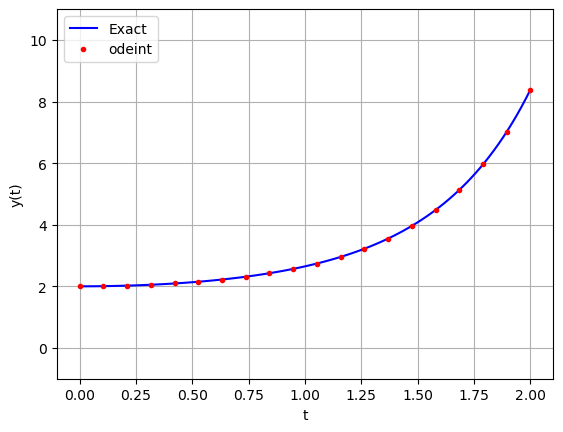

In [16]:
tf = 2
t = np.linspace(0,tf,100)
y = np.exp(t**2/2) + 1
plt.plot(t,y,'b')

f = lambda y,t: t*y - t
y0 = 2
T = np.linspace(0,tf,20)
Y = spi.odeint(f,y0,T)
plt.plot(T,Y,'r.')

plt.ylim([-1,11])
plt.grid(True)
plt.legend(['Exact','odeint'],loc='upper left')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

$y' + (t + 1)y = t + 1$, $y(0) = 0$

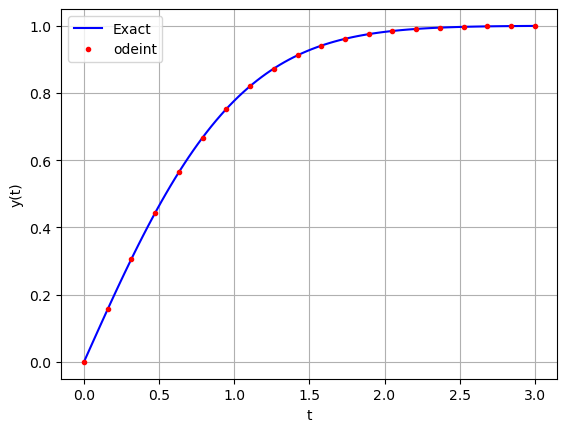

In [17]:
tf = 3
t = np.linspace(0,tf,100)
y = 1 - np.exp(-t**2/2 - t)
plt.plot(t,y,'b')

f = lambda y,t: (1 + t)*(1 - y)
y0 = 0
T = np.linspace(0,tf,20)
Y = spi.odeint(f,y0,T)
plt.plot(T,Y,'r.')

plt.grid(True)
plt.legend(['Exact','odeint'])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()